# MINI PROJECT 1
# Regression Prediction of insurance premium

# Importing important python libraries 

In [1]:
# General Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb      
import warnings
warnings.filterwarnings("ignore")


# Data Preprocessing 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data splitting 
from sklearn.model_selection import train_test_split

# Linear Regression 
from sklearn.linear_model import LinearRegression

# Regression Metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression

# Decision Tree Regression Model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import tree


# Random Forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

# Grid Search for cross validation 
from sklearn.model_selection import GridSearchCV


# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Importing the dataset

In [2]:
df = pd.read_csv("DS3_C6_S1_Regression_Insurance_Data_Project.csv")
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


# Data structure and summary 

In [3]:
df.shape

(1338, 8)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

# ------------------------------------------------------------------------------------------------------------
# Checking for Null values and/or Noise values and treating the values, if present

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Since column classif has null values, imputing the data with mode (since its object type)

In [8]:
df.classif.value_counts()

OB1     387
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64

## Since the Classif is dependent on the bmi value, hence taking bmi into consideration for fill the null values 

In [92]:
def fillnull(condition):
    conditions = [
        (df['bmi'] < 18.5),
        (df['bmi'] >= 18.5) & (df['bmi'] <= 25),
        (df['bmi'] > 25) & (df['bmi'] <= 30),
        (df['bmi'] > 30) & (df['bmi'] <= 35),
        (df['bmi'] > 35) & (df['bmi'] <= 40),
        (df['bmi'] > 40)
    ]

    values = ['UW', 'N', 'PREO', 'OB1','OB2','OB3']

    df['classif'] = np.select(conditions, values)

In [95]:
df.classif.fillna(fillnull)

0       PREO
1        OB1
2        OB1
3          N
4       PREO
        ... 
1333     OB1
1334     OB1
1335     OB2
1336    PREO
1337    PREO
Name: classif, Length: 1338, dtype: object

In [96]:
df.isnull().sum()

age               0
sex               0
bmi               0
classif           0
children          0
smoker            0
region            0
charges           0
sex_encode        0
classif_encode    0
smoker_encode     0
region_encode     0
dtype: int64

In [97]:
df.classif.value_counts()

OB1     389
PREO    386
N       227
OB2     225
OB3      91
UW       20
Name: classif, dtype: int64

## By this we can be positive that the values are true 

## --------------------------------------------------------------------------------------------------------------
## Checking for noise values 

In [22]:
for cols in df.columns:
    print(df[cols].value_counts())
    print("=====================")

18     71
19     67
48     29
47     29
20     29
46     29
45     29
50     29
51     29
52     29
24     28
26     28
22     28
21     28
27     28
54     28
53     28
23     28
25     28
28     28
49     28
40     27
43     27
29     27
44     27
41     27
42     27
30     27
31     27
57     26
34     26
56     26
32     26
55     26
39     25
33     25
38     25
36     25
35     25
59     25
37     25
58     24
63     23
62     23
60     23
61     22
64     22
190     1
1       1
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
OB1     387
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
nor

## There is 0 age, as it is not possible, replacing the value with mode of age
## There are two negative age as well applying abs function to remove the negative sign

In [23]:
df['age'] = df['age'].replace(to_replace = 0, value = (df['age'].mode()[0]))

In [24]:
df['age'] = df['age'].abs()
df['age'].value_counts()

18     71
19     67
48     29
47     29
20     29
46     29
45     29
50     29
51     29
52     29
24     28
26     28
22     28
21     28
27     28
54     28
53     28
23     28
25     28
28     28
49     28
40     27
43     27
29     27
44     27
41     27
42     27
30     27
31     27
57     26
34     26
56     26
32     26
55     26
39     25
33     25
38     25
36     25
35     25
59     25
37     25
58     24
63     23
62     23
60     23
61     22
64     22
190     1
1       1
Name: age, dtype: int64

## There no longer exists no noise and null values in the dataset 

# --------------------------------------------------------------------------------------------------------------
# Feature engineering 

In [25]:
cat_df = df.select_dtypes(exclude = [np.number])

for i in cat_df.columns:
    df[i] = df[i].astype('category')

df.dtypes

age                  int64
sex               category
bmi                float64
classif           category
children             int64
smoker            category
region            category
charges            float64
sex_encode           int32
classif_encode       int32
smoker_encode        int32
region_encode        int32
dtype: object

# --------------------------------------------------------------------------------------------------------------
# Label Encoding 

In [26]:
for i in cat_df.columns:
    df[i+'_encode'] = LabelEncoder().fit_transform(df[i])
    
df.dtypes

age                  int64
sex               category
bmi                float64
classif           category
children             int64
smoker            category
region            category
charges            float64
sex_encode           int32
classif_encode       int32
smoker_encode        int32
region_encode        int32
dtype: object

# --------------------------------------------------------------------------------------------------------------
# Data Scaling 

In [27]:
num_df = df.select_dtypes(include = [np.number])

scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(num_df), columns = num_df.columns)
scaled_df.head()

,age,bmi,children,charges,sex_encode,classif_encode,smoker_encode,region_encode
0,0.095238,0.321227,0.0,0.251611,0.0,0.666667,1.0,1.000000
1,0.089947,0.479150,0.2,0.009636,1.0,0.166667,0.0,0.666667
2,0.142857,0.458434,0.6,0.053115,1.0,0.166667,0.0,0.666667
3,0.089947,0.181464,0.0,0.333010,1.0,0.000000,0.0,0.333333
4,0.164021,0.347592,0.0,0.043816,1.0,0.666667,0.0,0.333333


In [28]:
df2 = df.copy()
df2['charges_label'] = pd.cut(x = df2['charges'], bins=[0, 10000, 20000, 40000,70000],
                     labels=['low', 'medium', 'high','very high'])

df2.head()

,age,sex,bmi,classif,children,smoker,region,charges,sex_encode,classif_encode,smoker_encode,region_encode,charges_label
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,0,4,1,3,medium
1,18,male,33.770,OB1,1,no,southeast,1725.55230,1,1,0,2,low
2,28,male,33.000,OB1,3,no,southeast,4449.46200,1,1,0,2,low
3,18,male,22.705,N,0,no,northwest,21984.47061,1,0,0,1,high
4,32,male,28.880,PREO,0,no,northwest,3866.85520,1,4,0,1,low


# --------------------------------------------------------------------------------------------------------
# Exploratory Data Analysis

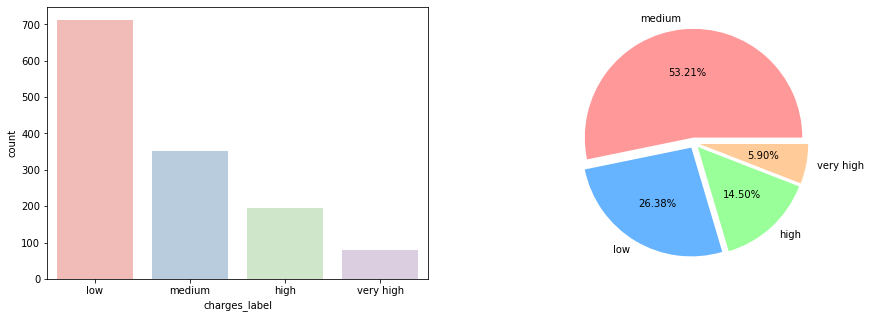

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sb.countplot(data = df2, x = df2['charges_label'], palette = 'Pastel1')

plt.subplot(122)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05)
perc = df2['charges_label'].value_counts()  # total count of values 
n =  df2['charges_label'].unique()          # unique values 
plt.pie(perc, labels = n, autopct='%.2f%%', explode = explode, colors = colors)

plt.show()

### Low charges are paid by more number of policy owners than the other categories.

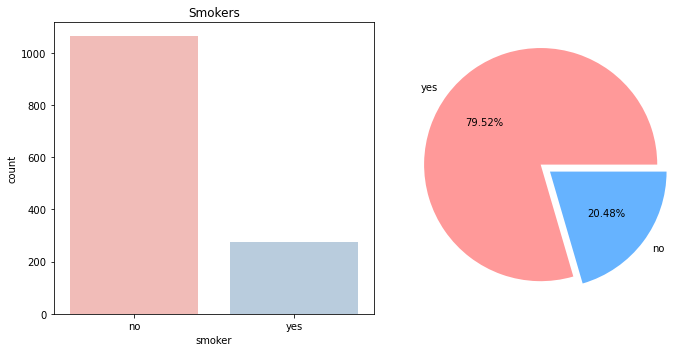

In [30]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title("Smokers")
sb.countplot(data = df, x = df['smoker'], palette = 'Pastel1')


plt.subplot(122)
colors = ['#ff9999','#66b3ff']
explode = (0.05,0.05)
perc = df['smoker'].value_counts()  # total count of values 
n =  df['smoker'].unique()          # unique values 
plt.pie(perc, labels = n, autopct='%.2f%%', explode = explode, colors = colors)
plt.tight_layout()
plt.show()

## Non smokers(1200) are more than smokers(approx 250)

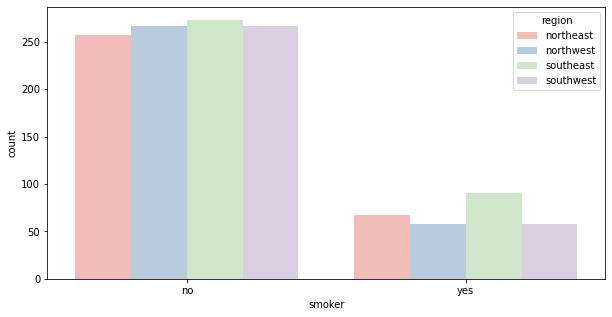

In [31]:
plt.figure(figsize=(10,5))
sb.countplot(data = df, x = df['smoker'], hue=df['region'], palette = 'Pastel1')
plt.show()

### Max people who smoke are from the southeast 
### Max people who do not smoke are also from southeast
### Region with least smoker is southwest and northwest
### northeast has lowest number of non smokers 
## hence there is no correlation between the regions and smoker

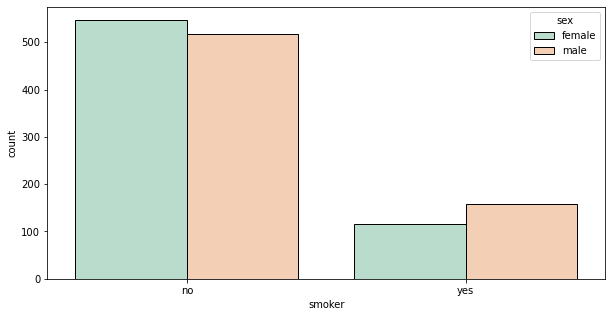

In [32]:
plt.figure(figsize=(10,5))
sb.countplot( data = df, x = df['smoker'], hue=df['sex'], palette = 'Pastel2',ec = 'black')
plt.show()

### There are more number of male smokers than females
### There are more number of female non smokers than male

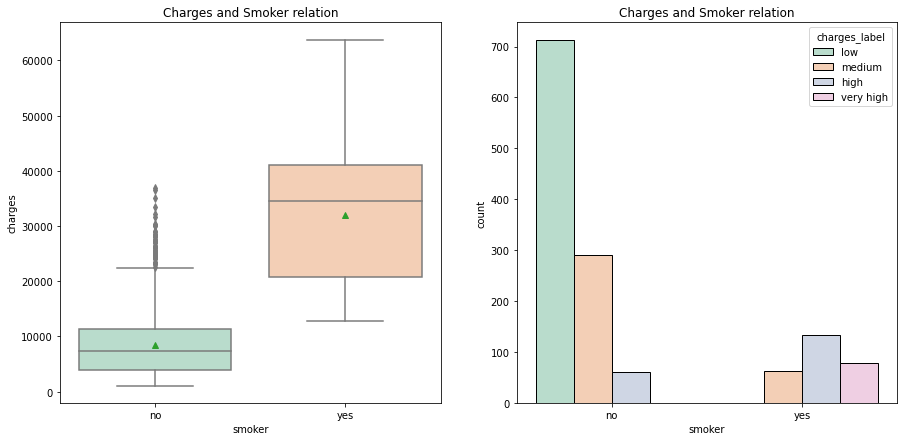

In [33]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.title("Charges and Smoker relation")
sb.boxplot(data=df,x= 'smoker', y='charges', palette = 'Pastel2', showmeans = True)

plt.subplot(122)
plt.title("Charges and Smoker relation")
sb.countplot( data = df2, x = df2['smoker'], hue=df2['charges_label'], palette = 'Pastel2',ec = 'black')
plt.show()


### The average charges paid by smokers is nearly 35000 where as the average charges paid by the non smokers is 7000-8000
### most people who do not smoke pay low charges ie. less than 10000  (700 people)
### most people who smoke pay high charges ie. between 20000 and 40000 (150 people)
### There is no smoker who pays low charges 
### There is no non smoker who pays very high charges

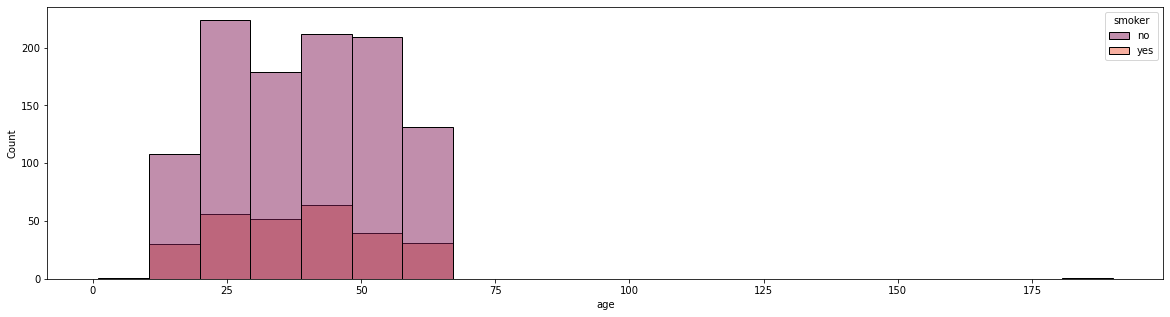

In [34]:
plt.figure(figsize=(20,5))
sb.histplot( data = df, x = df['age'], hue=df['smoker'], palette = 'rocket', bins = 20)
plt.show()

### Maximum number of smokers are in the age group 30-40 
### There is an outlier of age =1 and age = 190

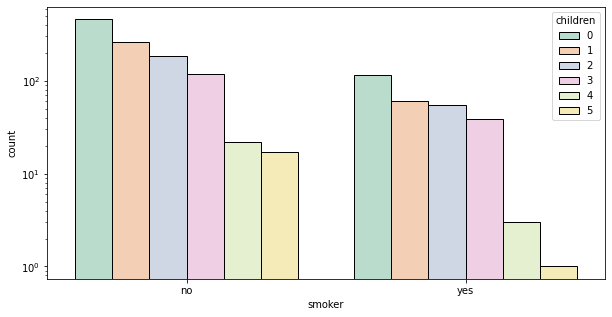

In [35]:
plt.figure(figsize=(10,5))
sb.countplot( data = df, x = df['smoker'], hue=df['children'], palette = 'Pastel2',ec = 'black')
plt.yscale('log')
plt.show()


### most non smoker have 0 children anf very few have 5 children 
### most smokers have 0 kids.
### comparitively more non smoker have 4 / 5  kids than the smoker  

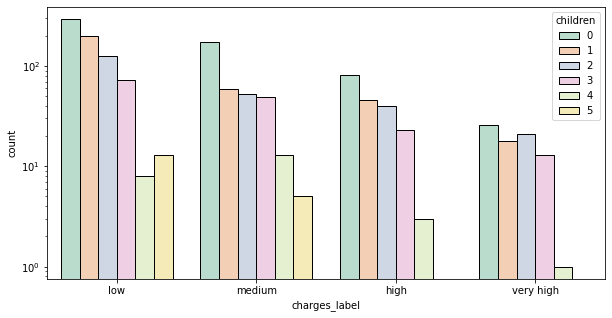

In [36]:
plt.figure(figsize=(10,5))
sb.countplot( data = df2, x = df2['charges_label'], hue=df2['children'], palette = 'Pastel2',ec = 'black')
plt.yscale('log')
plt.show()


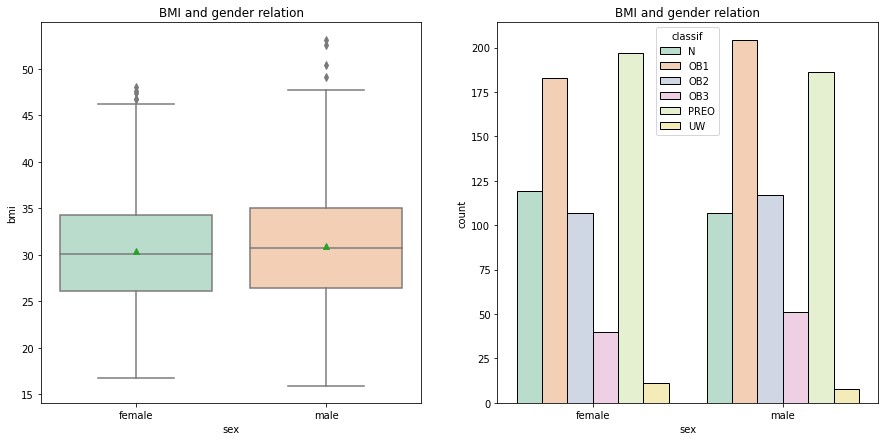

In [37]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.title("BMI and gender relation")
sb.boxplot(data=df, x= 'sex', y='bmi', palette = 'Pastel2', showmeans = True)

plt.subplot(122)
plt.title("BMI and gender relation")
sb.countplot( data = df, x = df['sex'], hue=df['classif'], palette = 'Pastel2', ec = 'black')

plt.show()

### The median and average bmi for both males and females have is equal with few outliers for both.
### In females there are more number of Pre-Obese and less number of under weight where as in males there are more number of obese type 1 and less number of underweight

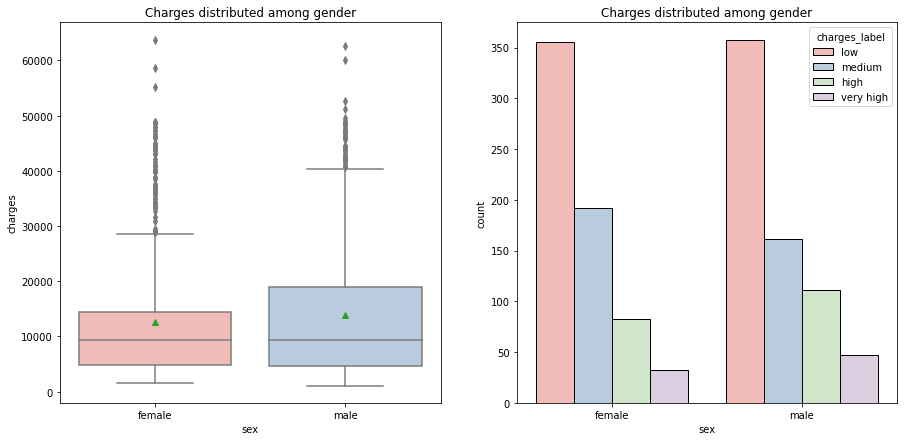

In [38]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.title("Charges distributed among gender")
sb.boxplot(data=df ,x= 'sex', y='charges', palette = 'Pastel1', showmeans = True)

plt.subplot(122)
plt.title("Charges distributed among gender")
sb.countplot( data = df2, x = df2['sex'], hue = df2['charges_label'], palette = 'Pastel1', ec='black')
plt.show()


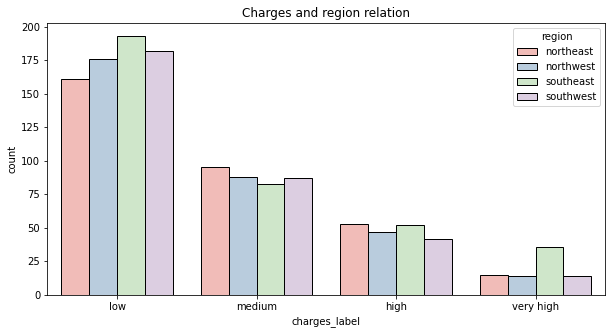

In [39]:
plt.figure(figsize=(10,5))
plt.title("Charges and region relation")
sb.countplot(data = df2, x = df2['charges_label'], hue=df2['region'], palette = 'Pastel1', ec = 'black')
plt.show()

### There is no relationship between these two features 

# --------------------------------------------------------------------------------------------------------------
# Finding correlation of target feature with independent features 

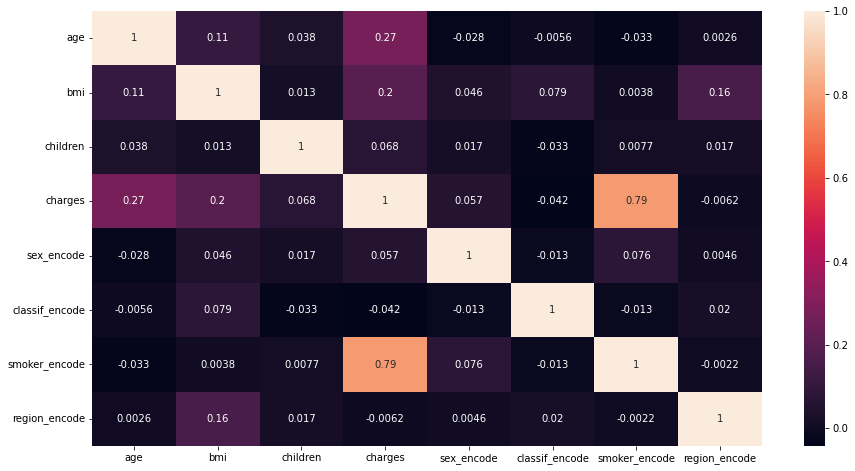

In [40]:
corr_values = scaled_df.corr()

plt.figure(figsize=(15,8))
sb.heatmap(corr_values, annot=True, cbar= True )
plt.show()

# Comparing the correlation values of the independent features with the dependent features :
## smoker_encode(0.79) > age(0.27) > bmi(0.2) > classif_encode(-0.042) > sex_encode(0.057) >  children (0.068)

# Univariate Linear Regression model 
## 'smoker' has the highest correlation value of 0.79 hence considering this feature for univariate model

# Bivariate Linear Regression model 
## 'smoker' and 'age' has the highest correlation value of 0.79 and 0.27 respectively hence considering these feature for bivariate model

# Multivariate Linear Regression Model 
## Taking all the features except for the 'region' as it is highly non correlated 

# --------------------------------------------------------------------------------------------------------------
# Train-Test-Split data

In [41]:
x1 = scaled_df['smoker_encode']
x1.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: smoker_encode, dtype: float64

In [42]:
y1 = scaled_df['charges']
y1.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

In [43]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 10)
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((1070,), (268,), (1070,), (268,))

In [44]:
x1_train = x1_train.values.reshape(-1,1)
x1_train.shape

(1070, 1)

In [45]:
y1_train = y1_train.values.reshape(-1,1)
y1_train.shape

(1070, 1)

In [46]:
x1_test = x1_test.values.reshape(-1,1)
x1_test.shape

(268, 1)

In [47]:
y1_test = y1_test.values.reshape(-1,1)
y1_test.shape

(268, 1)

# --------------------------------------------------------------------------------------------------------------
# Linear Regression Model - Univariate

In [48]:
uni_lrm = LinearRegression().fit(x1_train, y1_train)

In [49]:
# Calculating the R sq Value 

coef_deter1 = round((uni_lrm.score(x1_train, y1_train))*100,2)
print("R square - Coefficient of Determinant = {} % ".format(coef_deter1))

R square - Coefficient of Determinant = 62.28 % 


In [50]:
intercept1 = uni_lrm.intercept_
coef1 = uni_lrm.coef_

print("Intercept of line = ",intercept1)
print("Linear Regression Coefficient = ",coef1)

Intercept of line =  [0.11546876]
Linear Regression Coefficient =  [[0.38125756]]


## Conclusion: Since the R2 value is more than 50% this model can be used to predict the y values  

In [51]:
y_predict1 = uni_lrm.predict(x1_test)

In [52]:
uni_lrm_df =  pd.DataFrame()
uni_lrm_df['Y Predicted'] = pd.DataFrame(y_predict1)
uni_lrm_df['Y Actual'] = y1_test
uni_lrm_df['error'] = uni_lrm_df['Y Predicted'] - uni_lrm_df['Y Actual']
uni_lrm_df.round(2)

,Y Predicted,Y Actual,error
0,0.12,0.10,0.02
1,0.12,0.07,0.05
2,0.12,0.18,-0.06
3,0.12,0.37,-0.26
4,0.12,0.04,0.07
...,...,...,...
263,0.50,0.67,-0.17
264,0.12,0.03,0.08
265,0.12,0.34,-0.23
266,0.12,0.17,-0.05


## Metric calculation

In [53]:
mse1 = round(mean_squared_error(y1_test, y_predict1),2)
mae1 = round(mean_absolute_error(y1_test, y_predict1),2)
rmse1 = round(mean_squared_error(y1_test, y_predict1, squared= False),2)

print("Mean Squared Error      = ",mse1)
print("Mean Absolute Error     = ",mae1)
print("Root Mean Squared Error = ",rmse1)

Mean Squared Error      =  0.01
Mean Absolute Error     =  0.09
Root Mean Squared Error =  0.12


## Equation of x-y relationship (smoker - charges)

## y = (0.11 * x) + (0.38)

# Conclusion: as the value of errors is small and R2 value is 62.28%  this is a good model

# --------------------------------------------------------------------------------------------------------------
# Linear Regression Model - Bivariate

## Train_Test_Split 

In [54]:
x2 = scaled_df[['age','smoker_encode']]
y2 = scaled_df['charges']


x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 10)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((1070, 2), (268, 2), (1070,), (268,))

In [55]:
y2_train = y2_train.values.reshape(-1,1)
y2_test = y2_test.values.reshape(-1,1)
y2_train.shape, y2_test.shape

((1070, 1), (268, 1))

In [56]:
bi_lrm = LinearRegression().fit(x2_train, y2_train)

In [57]:
# Calculating the R sq Value 

coef_deter2 = round((bi_lrm.score(x2_train, y2_train))*100,2)
print("R square - Coefficient of Determinant = {} % ".format(coef_deter2))

R square - Coefficient of Determinant = 71.71 % 


In [58]:
intercept2 = bi_lrm.intercept_
coef2 = bi_lrm.coef_

print("Intercept of line = ",intercept2)
print("Linear Regression Coefficient = ",coef2)

Intercept of line =  [-0.03851562]
Linear Regression Coefficient =  [[0.75651072 0.38601677]]


## Conclusion: Since the R2 value is more than 50% this model can be used to predict the y values

In [59]:
y_predict2 = bi_lrm.predict(x2_test)
bi_lrm_df =  pd.DataFrame()
bi_lrm_df['Y Predicted'] = pd.DataFrame(y_predict2)
bi_lrm_df['Y Actual '] = y1_test
bi_lrm_df['error'] = bi_lrm_df['Y Predicted'] - bi_lrm_df['Y Actual ']
bi_lrm_df.round(2)

,Y Predicted,Y Actual,error
0,0.11,0.10,0.01
1,0.10,0.07,0.04
2,0.19,0.18,0.01
3,0.20,0.37,-0.17
4,0.07,0.04,0.03
...,...,...,...
263,0.54,0.67,-0.12
264,0.06,0.03,0.03
265,0.03,0.34,-0.31
266,0.19,0.17,0.02


# Metric calculation 

In [60]:
mse2 = round(mean_squared_error(y2_test, y_predict2),2)
mae2 = round(mean_absolute_error(y2_test, y_predict2),2)
rmse2 = round(mean_squared_error(y2_test, y_predict2, squared= False),2)

print("Mean Squared Error      = ",mse2)
print("Mean Absolute Error     = ",mae2)
print("Root Mean Squared Error = ",rmse2)

Mean Squared Error      =  0.01
Mean Absolute Error     =  0.07
Root Mean Squared Error =  0.11


## Equation of x-y relationship (smoker , age - charges)

## y = (0.75 * x1)+(0.38 * x2 ) + (-0.038)

# Conclusion: as the value of errors is small and R2 value is 71.71%  this is a good model

# --------------------------------------------------------------------------------------------------------------
# Linear Regression Model - multivariate

In [61]:
x3 = scaled_df.copy()
x3.drop(['charges', 'region_encode'], axis = 1, inplace = True)

y3 = scaled_df['charges']


x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 10)
x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [62]:
y3_train = y3_train.values.reshape(-1,1)
y3_test = y3_test.values.reshape(-1,1)
y3_train.shape, y3_test.shape

((1070, 1), (268, 1))

In [63]:
multi_lrm = LinearRegression().fit(x3_train, y3_train)

In [64]:
coef_deter3 = round((multi_lrm.score(x3_train, y3_train))*100,2)
print("R square - Coefficient of Determinant = {} % ".format(coef_deter3))

intercept3 = multi_lrm.intercept_
coef3 = multi_lrm.coef_

print("Intercept of line = ",intercept3)
print("Linear Regression Coefficient = ",coef3)

R square - Coefficient of Determinant = 75.19 % 
Intercept of line =  [-0.10630415]
Linear Regression Coefficient =  [[ 0.68873417  0.20974619  0.04584314 -0.00398171 -0.02745832  0.38524316]]


In [65]:
y_predict3 = multi_lrm.predict(x3_test)
multi_lrm_df =  pd.DataFrame()
multi_lrm_df['Y Predicted'] = pd.DataFrame(y_predict3)
multi_lrm_df['Y Actual'] = y1_test
multi_lrm_df['error'] = multi_lrm_df['Y Predicted'] - multi_lrm_df['Y Actual']
multi_lrm_df.round(2)

,Y Predicted,Y Actual,error
0,0.10,0.10,0.00
1,0.06,0.07,-0.00
2,0.22,0.18,0.04
3,0.15,0.37,-0.23
4,0.03,0.04,-0.01
...,...,...,...
263,0.57,0.67,-0.10
264,0.11,0.03,0.07
265,0.02,0.34,-0.32
266,0.22,0.17,0.05


In [66]:
mse3 = round(mean_squared_error(y3_test, y_predict3),2)
mae3 = round(mean_absolute_error(y3_test, y_predict3),2)
rmse3 = round(mean_squared_error(y3_test, y_predict3, squared= False),2)

print("Mean Squared Error      = ",mse3)
print("Mean Absolute Error     = ",mae3)
print("Root Mean Squared Error = ",rmse3)

Mean Squared Error      =  0.01
Mean Absolute Error     =  0.07
Root Mean Squared Error =  0.1


# Conclusion: as the value of errors is small and R2 value is 75.19%  this is a good model

# --------------------------------------------------------------------------------------------------------------
# Conclusion for Linear Regression Model 

In [67]:
linear = pd.DataFrame()
linear['model'] = ['Univariate','Bivariate','Multivariate']
linear['R sq % '] = [coef_deter1, coef_deter1, coef_deter3]
linear['MSE'] = [mse1, mse2, mse3]
linear['RMSE'] = [rmse1, rmse2, rmse3]
linear['MAE'] = [mae1, mae2, mae3]
linear.round(2)

,model,R sq %,MSE,RMSE,MAE
0,Univariate,62.28,0.01,0.12,0.09
1,Bivariate,62.28,0.01,0.11,0.07
2,Multivariate,75.19,0.01,0.10,0.07


# Multivariate Linear Regression model gives the best r2 value and least error hence that is the best model for prediction

## --------------------------------------------------------------------------------------------------------------------
# Decision Tree Regressor 

In [68]:
model_tree_reg = DecisionTreeRegressor(random_state = 10)

In [69]:
params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200]
}

In [70]:
grid_search = GridSearchCV(estimator=model_tree_reg,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")

In [71]:
%%time
grid_search.fit(x3_train, y3_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 156 ms
Wall time: 5.2 s


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [72]:
model_tree_best = grid_search.best_estimator_
model_tree_best

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=10)

In [73]:
tree_reg = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=10)

In [74]:
train_accuracy = tree_reg.fit(x3_train,y3_train)

print("R-Squared on train dataset = {}%".format((tree_reg.score(x3_train,y3_train)*100).round(2)))

test_accuracy = model_tree_reg.fit(x3_test,y3_test) 
test_accuracy1 = (tree_reg.score(x3_test,y3_test)*100).round(2)

print("R-Squared on test dataset = {}%".format(test_accuracy1))

R-Squared on train dataset = 82.88%
R-Squared on test dataset = 80.73%


## Since the R square values are extremely high this model is a good model 

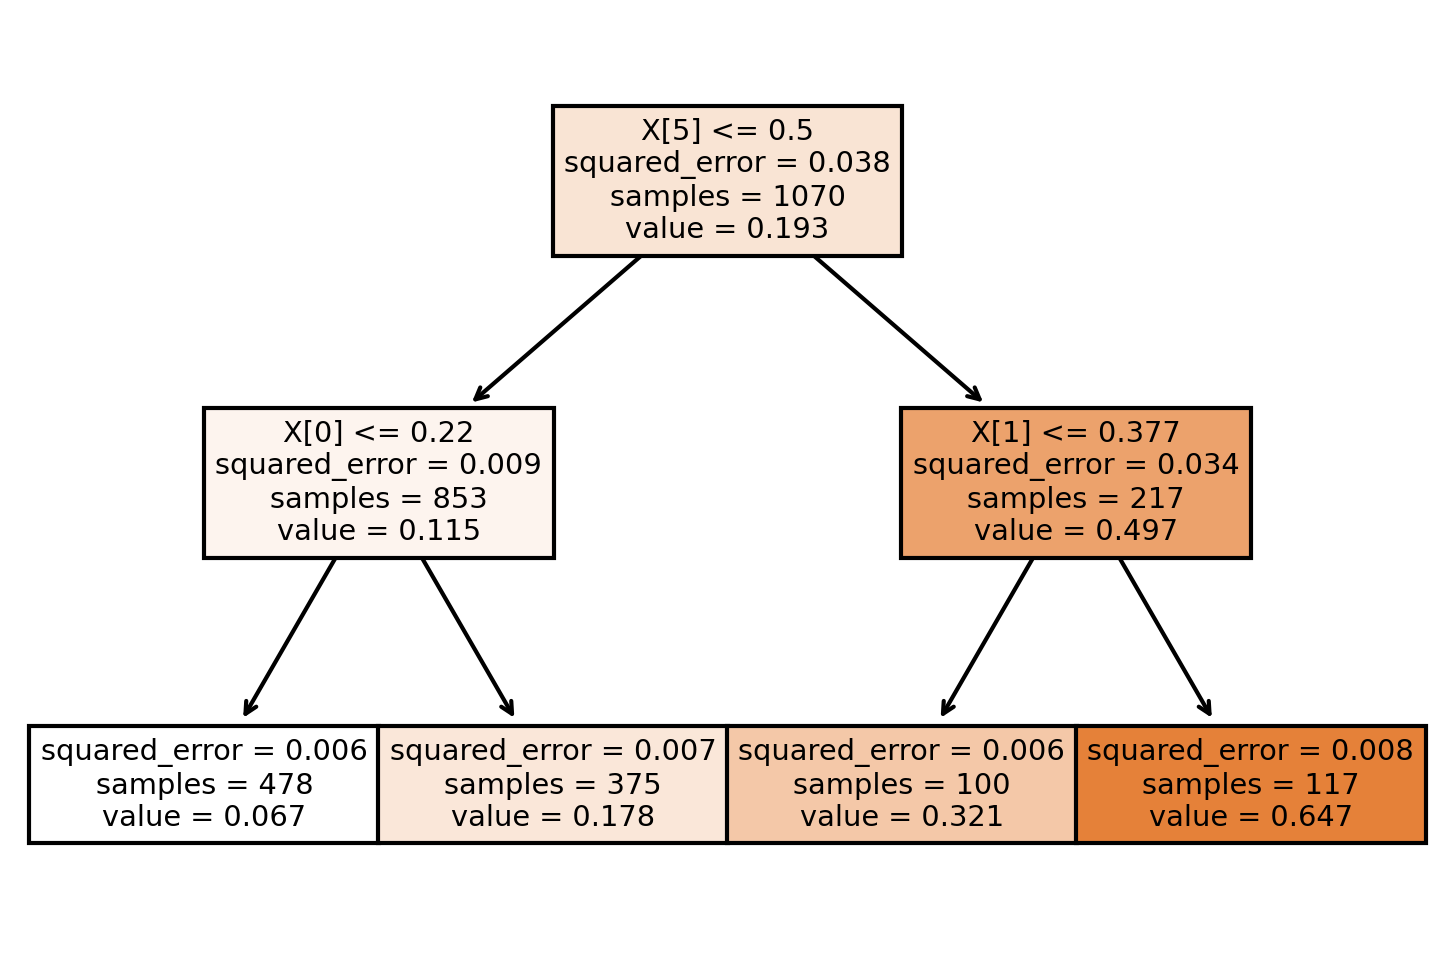

In [75]:
fig, axes = plt.subplots(dpi=300)
tree.plot_tree(tree_reg, filled = True)
plt.show()

In [76]:
y_predict4 = tree_reg.predict(x3_test)


y_values_dt = pd.DataFrame()
y_values_dt['Y Predicted'] = pd.DataFrame(y_predict4)
y_values_dt['Y Actual'] = y3_test
y_values_dt['Error'] = y_values_dt['Y Actual'] - y_values_dt['Y Predicted']
y_values_dt.round(2)

,Y Predicted,Y Actual,Error
0,0.07,0.10,0.03
1,0.07,0.07,-0.00
2,0.18,0.18,0.00
3,0.18,0.37,0.20
4,0.07,0.04,-0.02
...,...,...,...
263,0.65,0.67,0.02
264,0.07,0.03,-0.03
265,0.07,0.34,0.27
266,0.18,0.17,-0.01


In [77]:
mse4 = mean_squared_error(y3_test, y_predict4)
mae4 = mean_absolute_error(y3_test, y_predict4)
rmse4 = mean_squared_error(y3_test, y_predict4, squared= False)

print("Mean Squared Error      = ",mse4)
print("Mean Absolute Error     = ",mae4)
print("Root Mean Squared Error = ",rmse4)

Mean Squared Error      =  0.006885739215549826
Mean Absolute Error     =  0.054368931803104245
Root Mean Squared Error =  0.08298035439518095


# This is good model as there is high r2 value of 80% and lower values of errors

# -----------------------------------------------------------------------------------------------
# Random Forest regressor

In [78]:
x3.head()

,age,bmi,children,sex_encode,classif_encode,smoker_encode
0,0.095238,0.321227,0.0,0.0,0.666667,1.0
1,0.089947,0.479150,0.2,1.0,0.166667,0.0
2,0.142857,0.458434,0.6,1.0,0.166667,0.0
3,0.089947,0.181464,0.0,1.0,0.000000,0.0
4,0.164021,0.347592,0.0,1.0,0.666667,0.0


In [79]:
y3.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

In [80]:
# define the model
rfr_model = RandomForestRegressor()

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=10)
n_scores1 = cross_val_score(rfr_model, x3, y3, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('R2-Score: %.3f (%.3f)' % (np.mean(n_scores1), np.std(n_scores1)))

R2-Score: 0.820 (0.057)


In [81]:
rfr_model.fit(x3_train,y3_train)

print("R-Squared on train dataset = {}%".format((rfr_model.score(x3_train,y3_train)*100).round(2)))

rfr_model.fit(x3_test,y3_test) 

test_accuracy2 = (rfr_model.score(x3_test,y3_test)*100).round(2)

print("R-Squared on test dataset = {}%".format(test_accuracy2))

R-Squared on train dataset = 97.73%
R-Squared on test dataset = 96.77%


In [82]:
y_predict5 = rfr_model.predict(x3_test)


y_values_rfr = pd.DataFrame()
y_values_rfr['Y Predicted'] = pd.DataFrame(y_predict5)
y_values_rfr['Y Actual'] = y3_test
y_values_rfr['Error'] = y_values_rfr['Y Actual'] - y_values_rfr['Y Predicted']
y_values_rfr.round(2)

,Y Predicted,Y Actual,Error
0,0.09,0.10,0.00
1,0.07,0.07,0.00
2,0.18,0.18,-0.00
3,0.32,0.37,0.05
4,0.05,0.04,-0.01
...,...,...,...
263,0.65,0.67,0.01
264,0.04,0.03,-0.00
265,0.29,0.34,0.05
266,0.17,0.17,0.00


In [83]:
mse5 = mean_squared_error(y3_test, y_predict5)
mae5 = mean_absolute_error(y3_test, y_predict5)
rmse5 = mean_squared_error(y3_test, y_predict5, squared= False)

print("Mean Squared Error      = ",mse5)
print("Mean Absolute Error     = ",mae5)
print("Root Mean Squared Error = ",rmse5)

Mean Squared Error      =  0.0011540423084650834
Mean Absolute Error     =  0.019175949522683464
Root Mean Squared Error =  0.03397119821944883


# since the r2 value is extremely high there is probability that the model is overfitted 

# -----------------------------------------------------------------------------------------------
# Final Comparison 

In [84]:
model_compare = pd.DataFrame()
model_compare['model'] = ['Multivariate LR','Decision Tree','Random Forest (Bagging)']
model_compare['R sq % '] = [coef_deter3,test_accuracy1, test_accuracy2]
model_compare['MSE'] = [mse3,mse4,mse5]
model_compare['RMSE'] = [rmse3, rmse4, rmse5]
model_compare['MAE'] = [mae3, mae4, mae5]
model_compare.round(2)

,model,R sq %,MSE,RMSE,MAE
0,Multivariate LR,75.19,0.01,0.10,0.07
1,Decision Tree,80.73,0.01,0.08,0.05
2,Random Forest (Bagging),96.77,0.00,0.03,0.02


# Decision Tree gives better accuracy at lower level of error hence decision tree is a better model
# random forest is overfitted hence giving extremely high accuracy 

# -----------------------------------------------------------------------------------------------
# Visual representation of the Predicted values and actual values of Y 

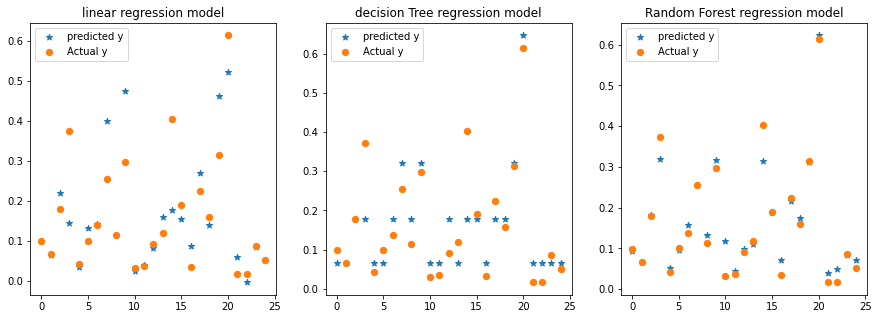

In [85]:
# Plotting y_test and y_predict

plt.figure(figsize = (15,5))
plt.subplot(131)

index = range(0,len(y3_test[:25]))
plt.title("linear regression model")
plt.scatter(index, multi_lrm_df['Y Predicted'][:25], marker ='*', label = 'predicted y', s = 40)
plt.scatter(index, multi_lrm_df['Y Actual'][:25], marker = "o", label = 'Actual y', s = 40)
plt.legend()

plt.subplot(132)

index = range(0,len(y3_test[:25]))
plt.title("decision Tree regression model")
plt.scatter(index, y_values_dt['Y Predicted'][:25], marker ='*', label = 'predicted y', s = 40)
plt.scatter(index, y_values_dt['Y Actual'][:25], marker = "o",label = 'Actual y', s = 40)
plt.legend()

plt.subplot(133)

index = range(0,len(y3_test[:25]))
plt.title("Random Forest regression model")
plt.scatter(index, y_values_rfr['Y Predicted'][:25], marker ='*', label = 'predicted y', s = 40)
plt.scatter(index, y_values_rfr['Y Actual'][:25], marker = "o",label = 'Actual y', s = 40)
plt.legend()

plt.show()